<h3>Implementing DBSCAN</h3>

In [12]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#importing the dataset
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data.Fresh=scaler.fit_transform(pd.DataFrame(data["Fresh"]))
data.Milk=scaler.fit_transform(pd.DataFrame(data["Milk"]))
data.Grocery=scaler.fit_transform(pd.DataFrame(data["Grocery"]))
data.Frozen=scaler.fit_transform(pd.DataFrame(data["Frozen"]))
data.Detergents_Paper=scaler.fit_transform(pd.DataFrame(data["Detergents_Paper"]))
data.Delicassen=scaler.fit_transform(pd.DataFrame(data["Delicassen"]))
#Applying PCA to reduce the number of features so to help in visualization
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_transformed=pca.fit_transform(data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]])
data=pd.DataFrame(x_transformed,columns=["Feature1","Feature2"])
data.head()

,Feature1,Feature2
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434


In [18]:
#DBSCAN
from sklearn.cluster import DBSCAN
model=DBSCAN()
y_pred=model.fit_predict(data)

In [22]:
#Metrics
from sklearn.metrics import silhouette_score
print(silhouette_score(data,y_pred))

0.6817584697903291


<Axes: xlabel='Feature1', ylabel='Feature2'>

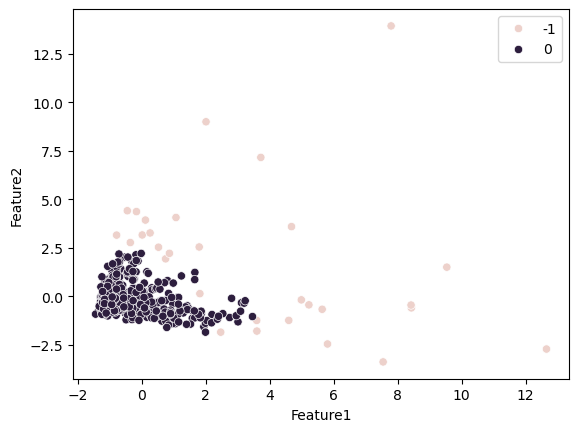

In [24]:
#plotting the clusters
sns.scatterplot(x=data.Feature1,y=data.Feature2,hue=y_pred)